In [12]:
import numpy as np
import pickle
import torch
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx
import networkx as nx

# Load node features
features = np.load('features_pre.npy')

# Load labels from the pickle file and extract the 'label' key
with open('labels_pre.pkl', 'rb') as f:
    labels_dict = pickle.load(f)

# Check the keys of the dictionary to understand its structure
print(labels_dict.keys())

# Assuming you want to extract the actual labels (which should have been stored as 'label')
if 'label' in labels_dict:
    labels = labels_dict['label']
else:
    raise KeyError("The expected 'label' key was not found in the dictionary.")

# Convert the extracted labels to a numpy array with proper dtype
labels = np.array(labels, dtype=np.int64)  # Ensure labels are in a numeric format

# Load the graph structure from 'graph_pre.bin'
edge_list = np.fromfile('graph_pre.bin', dtype=np.int32)
# Reshape into pairs of (source, destination)
edge_list = edge_list.reshape(-1, 2)
edges = [(int(src), int(dst)) for src, dst in edge_list]

# Create a NetworkX graph from the edge list
G = nx.Graph()
G.add_edges_from(edges)

# Convert the NetworkX graph to PyTorch Geometric Data format
pyg_graph = from_networkx(G)

# Add node features and labels
# Convert numpy arrays to PyTorch tensors
pyg_graph.x = torch.tensor(features, dtype=torch.float)
pyg_graph.y = torch.tensor(labels, dtype=torch.long)

# Print the PyTorch Geometric graph object
print(pyg_graph)


dict_keys(['train_labels_idx', 'test_labels_idx', 'label'])
Data(edge_index=[2, 6062400], num_nodes=65851, x=[3030932, 300], y=[3030932])


Number of nodes: 65851
Number of edges: 6062400


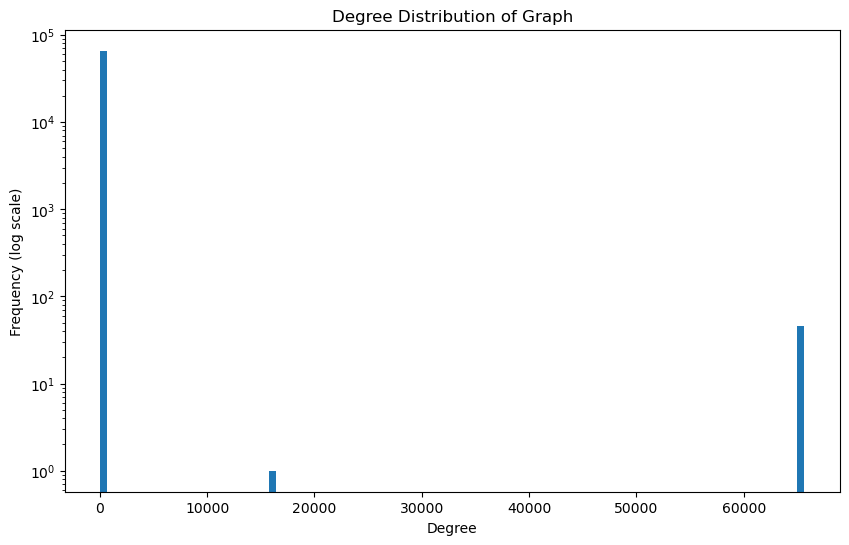

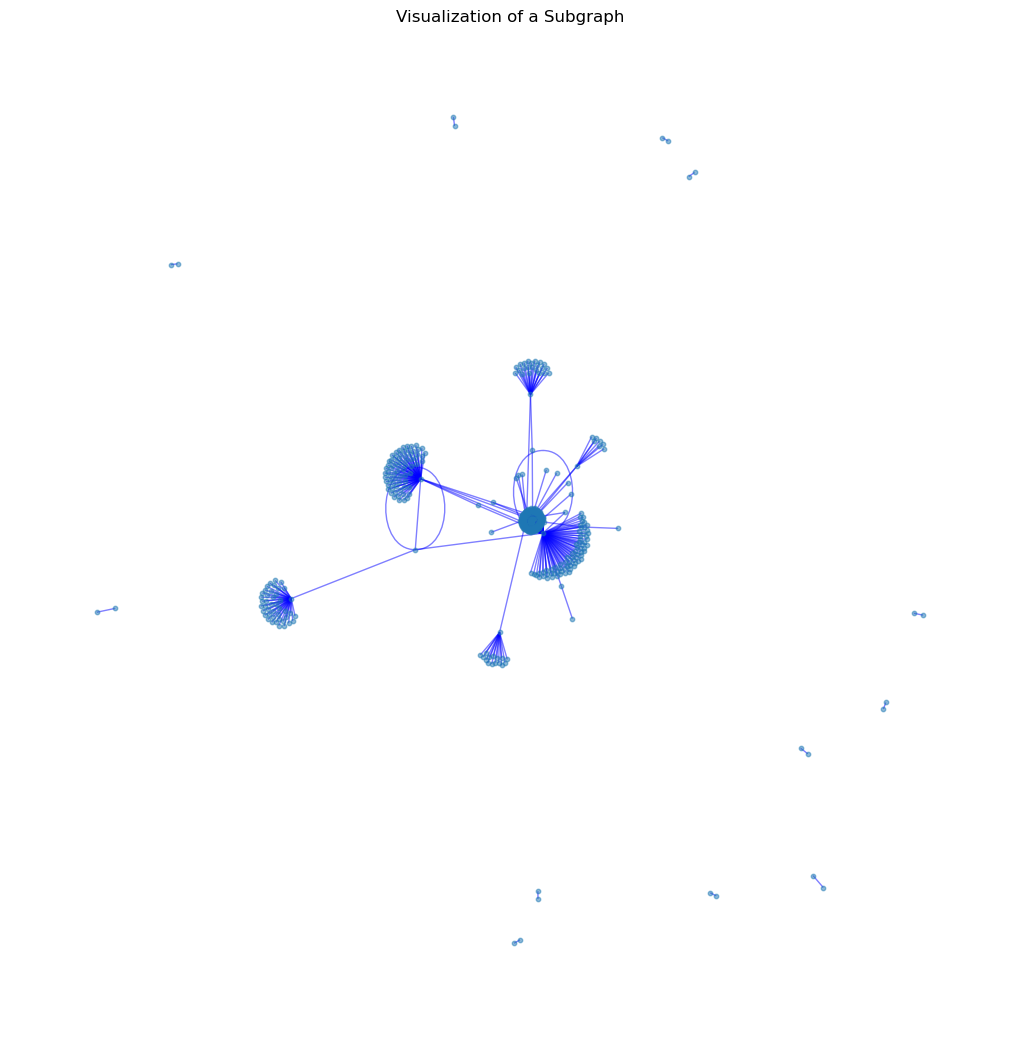

In [13]:
import matplotlib.pyplot as plt

# 1. Basic Statistics
num_nodes = pyg_graph.num_nodes
num_edges = pyg_graph.num_edges
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# 2. Degree Distribution
degrees = [degree for _, degree in G.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=100, log=True)
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution of Graph')
plt.show()

# 3. Visualizing a Small Subgraph
# Select a random subgraph of the original graph for visualization purposes
subgraph_nodes = list(G.nodes)[:500]  # Select a subset of nodes
subgraph = G.subgraph(subgraph_nodes)

# Plot the subgraph using NetworkX
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=False, node_size=10, edge_color='b', alpha=0.5)
plt.title('Visualization of a Subgraph')
plt.show()

In [17]:
from torch_geometric.utils import degree
# Extract dataset statistics from PyTorch Geometric Data
num_nodes = pyg_graph.num_nodes
num_edges = pyg_graph.num_edges
num_features = pyg_graph.num_node_features
num_classes = len(torch.unique(pyg_graph.y))

# Calculate number of isolated nodes
degrees = degree(pyg_graph.edge_index[0], num_nodes=num_nodes)
num_isolated_nodes = torch.sum(degrees == 0).item()

# Calculate number of labeled nodes and non-labeled nodes
num_labeled_nodes = torch.sum(pyg_graph.y != -1).item()  # Assuming -1 indicates an unlabeled node
num_non_labeled_nodes = num_nodes - num_labeled_nodes

# Calculate in-degree and out-degree statistics
in_degrees = degree(pyg_graph.edge_index[1], num_nodes=num_nodes)
out_degrees = degree(pyg_graph.edge_index[0], num_nodes=num_nodes)
max_in_degree = torch.max(in_degrees).item()
max_out_degree = torch.max(out_degrees).item()
avg_in_degree = torch.mean(in_degrees.float()).item()
avg_out_degree = torch.mean(out_degrees.float()).item()

# Print the statistics
print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Number of isolated nodes: {num_isolated_nodes}")
print(f"Number of labeled nodes: {num_labeled_nodes}")
print(f"Number of non-labeled nodes: {num_non_labeled_nodes}")
print(f"Number of node categories: {num_classes}")
print(f"Maximum node in-degree: {max_in_degree}")
print(f"Maximum node out-degree: {max_out_degree}")
print(f"Average node in-degree: {avg_in_degree:.2f}")

Total number of nodes: 65851
Total number of edges: 6062400
Number of isolated nodes: 0
Number of labeled nodes: 935353
Number of non-labeled nodes: -869502
Number of node categories: 24
Maximum node in-degree: 65656.0
Maximum node out-degree: 65656.0
Average node in-degree: 92.06


In [20]:
from torch_geometric.datasets import CitationFull
from torch_geometric.utils import degree
import torch

# Load the DBLP dataset
dataset = CitationFull(root='/tmp/CitationFull', name='Cora')
data = dataset[0]

# Extract dataset statistics
num_nodes = data.num_nodes
num_edges = data.num_edges // 2  # Since edges are bidirectional in torch_geometric, divide by 2
num_features = dataset.num_features
num_classes = len(torch.unique(data.y))

# Calculate number of isolated nodes
degrees = degree(data.edge_index[0], num_nodes=num_nodes)
num_isolated_nodes = torch.sum(degrees == 0).item()

# Calculate number of labeled nodes and non-labeled nodes
num_labeled_nodes = torch.sum(data.y != -1).item()  # Assuming -1 indicates an unlabeled node
num_non_labeled_nodes = num_nodes - num_labeled_nodes

# Calculate in-degree and out-degree statistics
in_degrees = degree(data.edge_index[1], num_nodes=num_nodes)
out_degrees = degree(data.edge_index[0], num_nodes=num_nodes)
max_in_degree = torch.max(in_degrees).item()
max_out_degree = torch.max(out_degrees).item()
avg_in_degree = torch.mean(in_degrees.float()).item()
avg_out_degree = torch.mean(out_degrees.float()).item()

# Print the statistics
print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Number of isolated nodes: {num_isolated_nodes}")
print(f"Number of labeled nodes: {num_labeled_nodes}")
print(f"Number of non-labeled nodes: {num_non_labeled_nodes}")
print(f"Number of node categories: {num_classes}")
print(f"Maximum node in-degree: {max_in_degree}")
print(f"Maximum node out-degree: {max_out_degree}")
print(f"Average node in-degree: {avg_in_degree:.2f}")
print(f"Average node out-degree: {avg_out_degree:.2f}")


Processing...


Total number of nodes: 19793
Total number of edges: 63421
Number of isolated nodes: 0
Number of labeled nodes: 19793
Number of non-labeled nodes: 0
Number of node categories: 70
Maximum node in-degree: 297.0
Maximum node out-degree: 297.0
Average node in-degree: 6.41
Average node out-degree: 6.41


Done!
